In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Domain Understanding
Given data of bank customer. The objective is to find the most impacting factors that cause exitness of customer, and predict the output (either customer leave or stay) based on (new) data in the future.

In [2]:
df = pd.read_csv('Bank_churn_modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Data Exploration and Collection

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [5]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.skew()

RowNumber          0.000000
CustomerId         0.001149
CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

## 3. Data Cleaning

In [8]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df.duplicated().sum()

0

## 4. Feature Engineering

In [11]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [12]:
num=['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
cat=['Geography', 'Gender','HasCrCard','IsActiveMember']

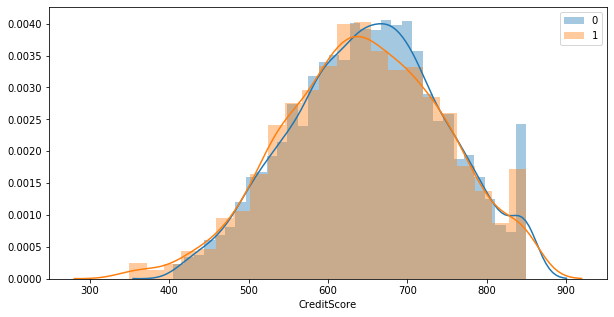

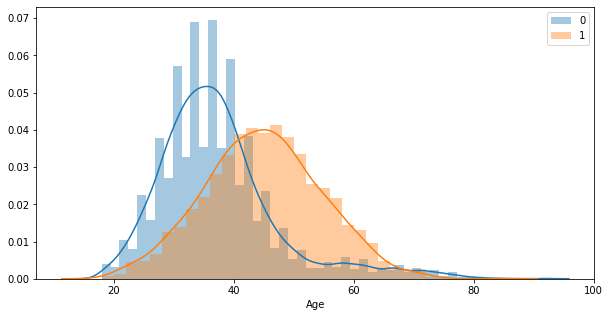

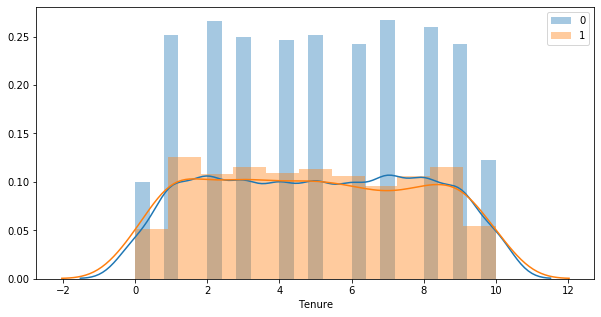

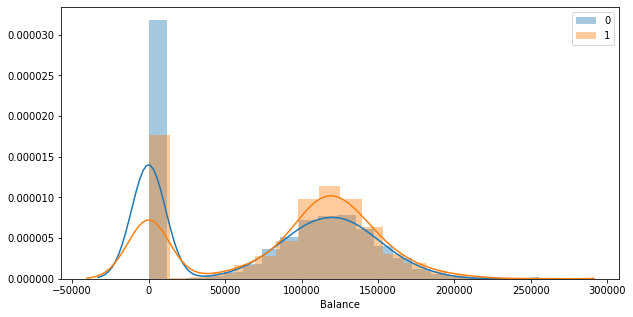

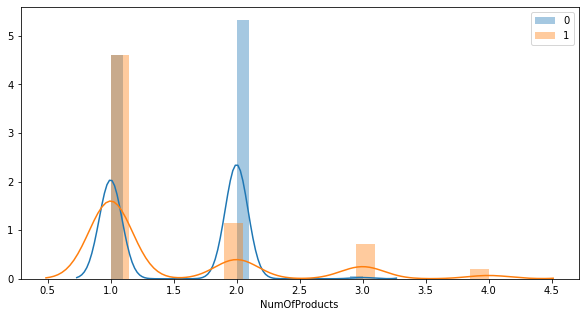

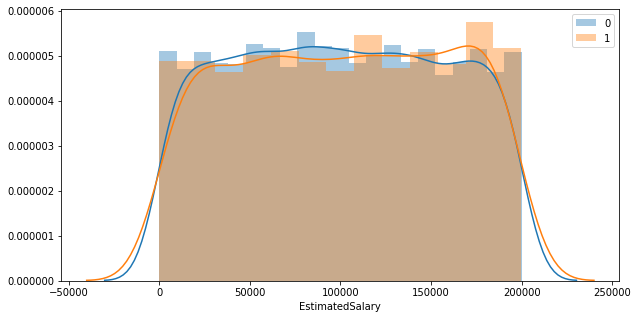

In [13]:
for col in num:
    plt.figure(figsize=(10,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['0','1'])
    plt.show()

- CreditScore doesn't significantly impact exited behaviour
- Most customers who stay are in age range below 40. Younger customers tend to stay, older customers tend to leave the bank.
- Tenure doesn't impact exited behaviour
- Balance doesn't impact exited behaviour
- Customers who have higher NumOfProducts tend to leave
- Estimated salary doesn't significantly impact exited behaviour

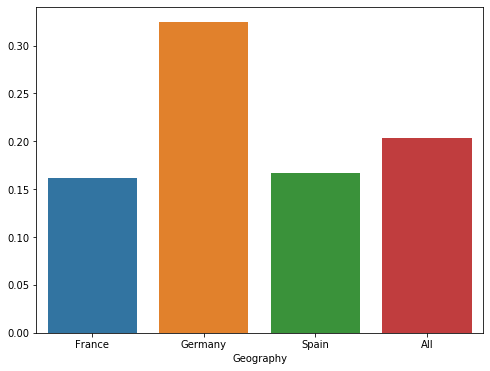

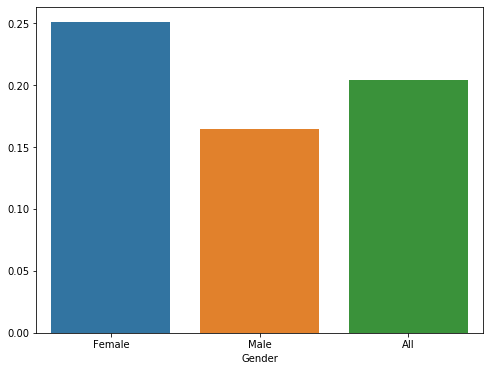

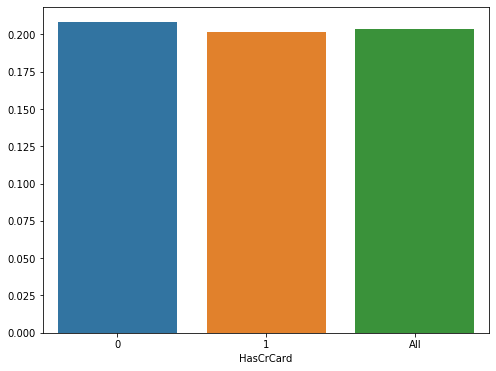

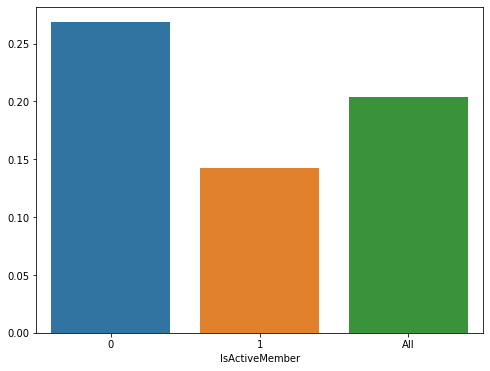

In [14]:
for col in cat:
    table = pd.crosstab(df[col],df['Exited'],margins=True)
    dropout_rate = table[1]/table['All']
    plt.figure(figsize=(8,6))
    sns.barplot(dropout_rate.index,dropout_rate.values)
    plt.show()

- Germany customers tend to leave bank
- Female customers tend to leave bank
- CreditCard ownership doesn't impact exit behaviour
- Unactive member tend to leave bank

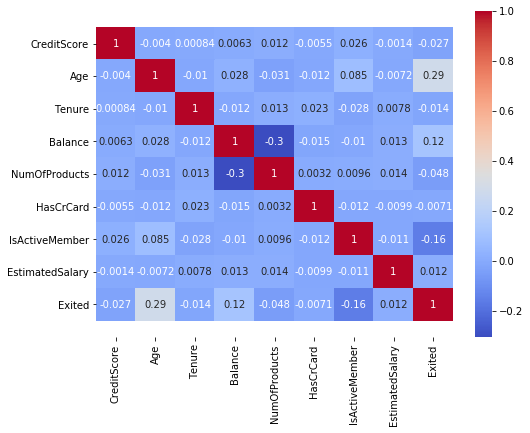

In [15]:
cor=df.corr()
plt.figure(figsize=(8,6))
ax=sns.heatmap(cor,annot=True,cmap='coolwarm')
bot,top = ax.get_ylim()
ax.set_ylim(bot+0.5, top-0.5)
plt.show()

Logistic regression is linear model to modelling classification problem. So we need to know the linear correlation among features first.
- bad correlation: CreditScore, Tenure, NumOfProducts, HasCrCard, EstimatedSalary
- good correlation: Age, Balance, IsActiveMember

Among all 8 numeric features 3 of them are good correlation, the rest 5 are bad correlation. None of them are very good correlation. In general, can be concluded that the linear correlation is not quite good. It means the pattern generally is not linear. 

#### ANOVA 
ANOVA - Analysis of variance – compare means / variation in two or more samples

Sample1 – an array having data of age of customers who left the bank

Sample2 – an array having data of age of customers who didn't leave the bank
*************************************************************
 

 

**For ANOVA -**  

Null Hypothesis – H0 = means of two samples are similar to each other

Alternate Hypothesis – Ha = means of two samples are different than each other
 

 

- If the business confidence is = 95% = 0.95 

- Significance level = 5% = 0.05 

 ******************************

 

If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = feature is not important  

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = feature is important 

In [16]:
x = df[num]
y = df.Exited

from sklearn.feature_selection import f_regression
fvalue,pval = f_regression(x,y)
for i in range(len(x.columns)):
    print(x.columns[i],pval[i]) 

CreditScore 0.006738213892205324
Age 1.2399313093459443e-186
Tenure 0.1615268494946745
Balance 1.2755633191546494e-32
NumOfProducts 1.717333004806199e-06
EstimatedSalary 0.22644042802263928


Assuming business confidence is 95%.
- CreditScore, Age, Balance, NumofProducts: important features
- Tenure, EstimatedSalary : unimportant features

#### Chi Square Test 
Chi Square Test - comparison of distribution of categories among multiple groups

It is widely used in categorical data

Sample1 – distribution of geography for customers who left

Sample2 – distrbution of geography for customers who didn't leave
*************************************************************
 

 

**For Chi Square -**  

Null Hypothesis – H0 = two groups have similar distribution 

Alternate Hypothesis – Ha = two groups have different distribution.
 

 

- If the business confidence is = 95% = 0.95 

- Significance level = 5% = 0.05 

 ******************************

 

If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = feature is not important  

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = feature is important 

In [17]:
xcat = df[cat]
from sklearn.preprocessing import LabelEncoder
xcat.Geography = LabelEncoder().fit_transform(xcat.Geography)
xcat.Gender = LabelEncoder().fit_transform(xcat.Gender)

from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)
for i in range(len(cat)):
    print(cat[i],' ',pval[i])

Geography   0.0005756078382573235
Gender   7.015574513879596e-13
HasCrCard   0.6984962089530451
IsActiveMember   1.568036240543455e-27


C:\Users\Juanda\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


HasCrCard is unimportant feature

In [18]:
#encoding categorical values
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [19]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [20]:
x= df.drop(['Exited','Tenure','HasCrCard','EstimatedSalary'],axis=1)
y=df.Exited

In [21]:
#for gender
le=LabelEncoder()
le.fit(x.Gender)
x.Gender = le.transform(x.Gender)
x.head(6)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1
5,645,Spain,1,44,113755.78,2,0


In [22]:
#encoding geography
from sklearn.preprocessing import StandardScaler 
encoder = ColumnTransformer([('ohe',OneHotEncoder(),[1])],remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2 = pd.DataFrame(x2)
x2.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,619.0,0.0,42.0,0.00,1.0,1.0
1,0.0,0.0,1.0,608.0,0.0,41.0,83807.86,1.0,1.0
2,1.0,0.0,0.0,502.0,0.0,42.0,159660.80,3.0,0.0
3,1.0,0.0,0.0,699.0,0.0,39.0,0.00,2.0,0.0
4,0.0,0.0,1.0,850.0,0.0,43.0,125510.82,1.0,1.0


## 5. Preprocessing of Data

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2, random_state=5)

## 6. Apply Machine Learning Algorithm - Logistic Regression

In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(xtrain,ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
new_customer = [[650,'Germany',1,51,456125,3,1]]
new_customer = encoder.transform(new_customer)

In [27]:
model.predict(new_customer)

array([1], dtype=int64)

## 7. Performance Analysis - Logistic Regression

In [28]:
#accuracy score is used to measure the exactness of predicted to the actual value
#0.90 means 90% of predicted value have exactly value with actual
#it is usually used in classification problem
ypred = model.predict(xtest)
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.792

### Relevant Accuracy
<img src ='images/relevant_accuracy.png'>

In [29]:
metrics.recall_score(ytest,ypred)

0.05185185185185185

from 79% accuracy, only 5% is useful to business

The objective of the machine is to identify customers who are more likely to leave. This result mean machine is able to correctly identify 5% of data as leaving customer.

<img src ='images/confusion.png'>

In [30]:
metrics.confusion_matrix(ytest,ypred)

array([[1563,   32],
       [ 384,   21]], dtype=int64)

- there are 2000 (1563+32+384+21) test data
- (1563+32)???
- out of 405 (384+21) customers who are leaving, 20 of them are correctly identified by machine

In [31]:
metrics.f1_score(ytest,ypred)

0.09170305676855894

what is the meaning of f1 score?

In [32]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1


### Bias in high scale features
Feature Balance has higher scale than Age and CreditScore. Mathematically, it will impacting more in calculation. But, based on statistic analysis, age is more impacting than balance to the target (Exited). It cause bias in model building. To handle it, we can build othe approach which bring features to the same scale.
- back to feature encoding

<img src ='images/feature_scaling.jpg'>

## 8. Optimization using Decision Tree

In [33]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion='gini')
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [34]:
ypred2 = model2.predict(xtest)
from sklearn.metrics import accuracy_score,recall_score
metrics.accuracy_score(ytest,ypred2)

0.7895

In [35]:
metrics.recall_score(ytrain,model2.predict(xtrain))

0.9987745098039216

In [36]:
metrics.recall_score(ytest,ypred2)

0.5160493827160494

### Visualizing Decision Tree

In [37]:
from sklearn.preprocessing import StandardScaler
# Remove the feature scaling
encoder = ColumnTransformer([("ohe",OneHotEncoder(),[1])],remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2.shape

(10000, 9)

In [38]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2,random_state=5)

In [39]:
#build new model
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion="gini",max_depth=8,max_leaf_nodes=30)
# train the model using train data - xtrain, ytrain
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
metrics.recall_score(ytrain,model3.predict(xtrain))

0.47855392156862747

In [41]:
metrics.recall_score(ytest,model3.predict(xtest))

0.43703703703703706

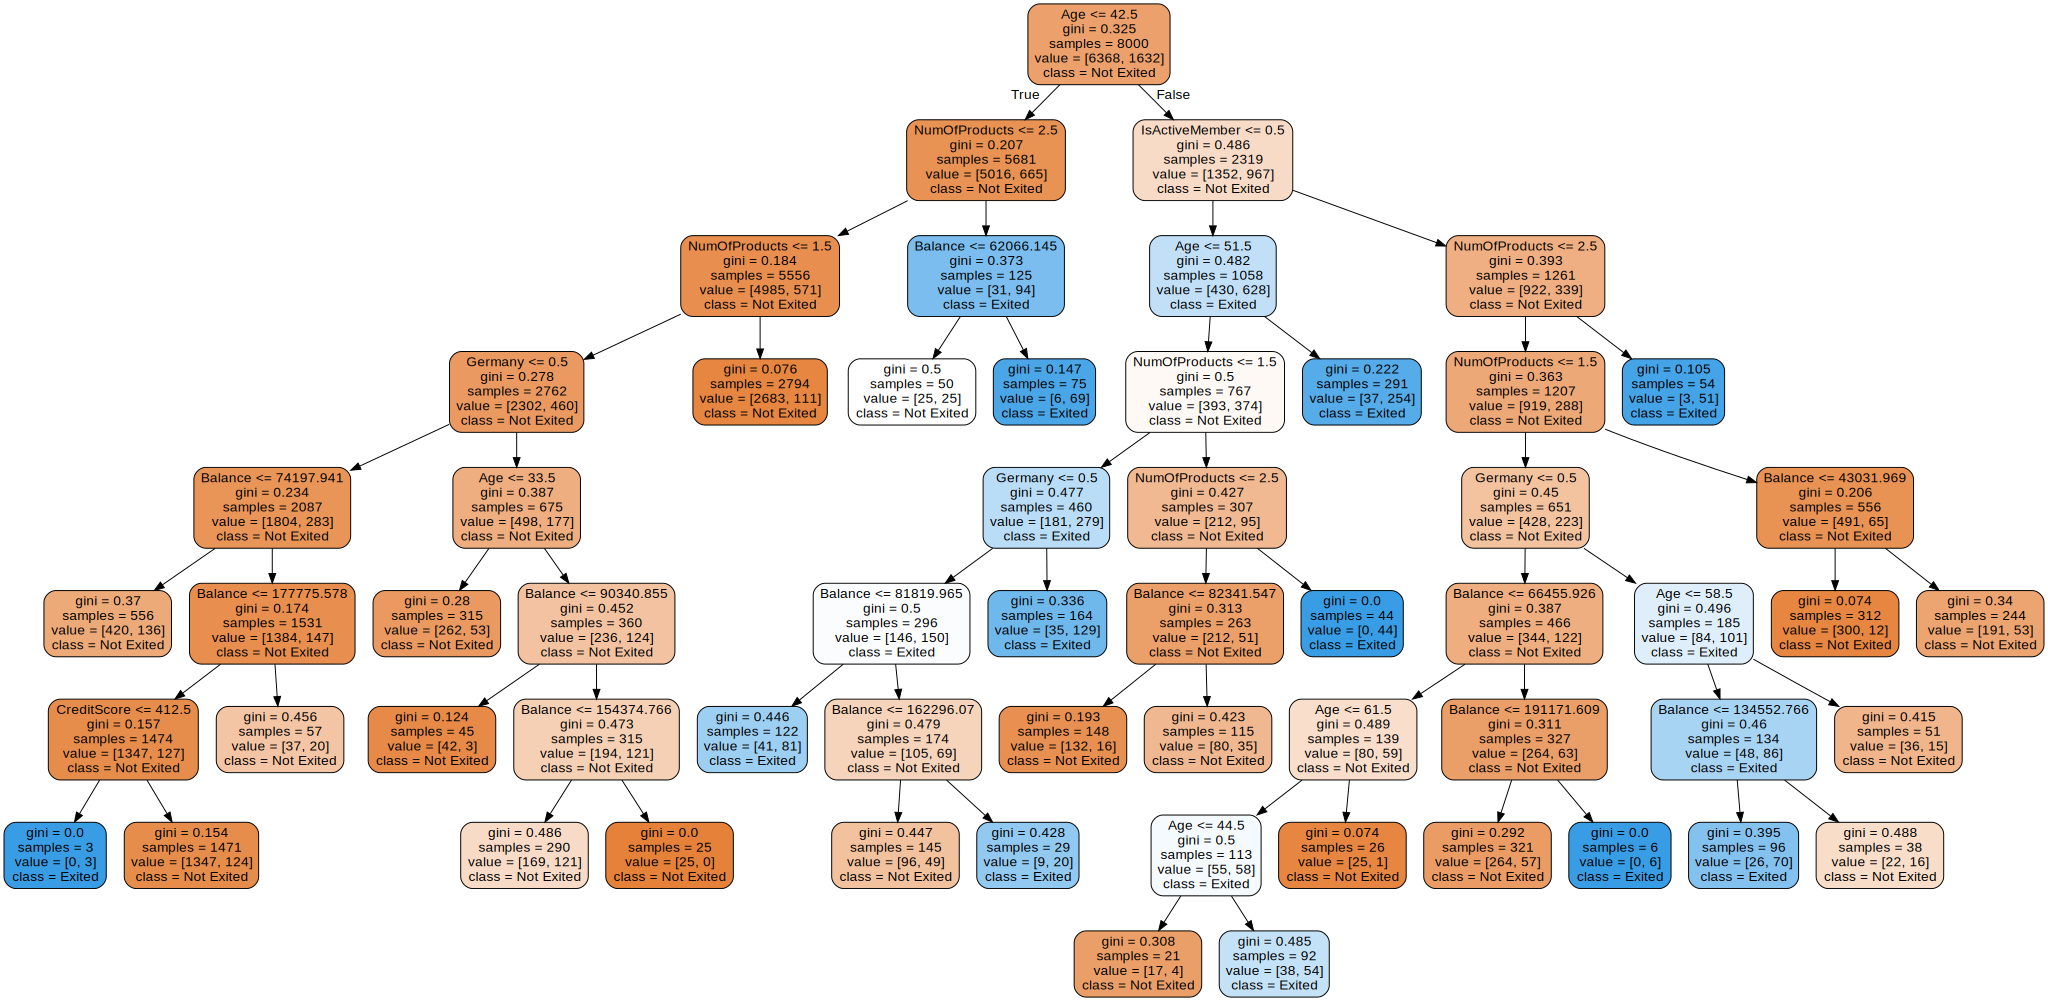

In [42]:
import graphviz
from sklearn import tree
features_names = ["France","Germany","Spain",'CreditScore','Gender','Age','Balance',
       'NumOfProducts','IsActiveMember']
class_names = ['Not Exited','Exited']
graph_data = tree.export_graphviz(model3,feature_names=features_names,class_names=class_names,
                                 rounded=True, filled=True)
graph = graphviz.Source(graph_data)
graph

In [43]:
#feature importance - can be useful for feature selection
#higher values means more important feature
model3.feature_importances_

array([0.        , 0.05476512, 0.        , 0.00506709, 0.        ,
       0.39679349, 0.1067971 , 0.31412134, 0.12245586])

In [44]:
for i in range(len(features_names)): print(features_names[i],model3.feature_importances_[i])

France 0.0
Germany 0.05476512475600039
Spain 0.0
CreditScore 0.005067085758864605
Gender 0.0
Age 0.3967934856541816
Balance 0.10679710428617165
NumOfProducts 0.3141213359920958
IsActiveMember 0.12245586355268591


## 8. Optimization and Tuning
### Handle overfitting

In [45]:
#build new model
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=20,random_state=5)
model4.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=12, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=5, splitter='best')

In [46]:
metrics.recall_score(ytrain,model3.predict(xtrain))

0.47855392156862747

In [47]:
metrics.recall_score(ytest,model4.predict(xtest))

0.4740740740740741

### Hyperparameter tuning using gridsearch

In [48]:
grid = {'max_depth':np.arange(5,31,2),
       'min_samples_leaf':np.arange(10,51,5),
       'min_samples_split':np.arange(10,101,10)}

In [49]:
np.arange(5,30,2)

array([ 5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])

In [50]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid=grid,verbose =True,scoring='recall',cv=5,n_jobs=-1)

In [51]:
grid_search.fit(x2,y)

Fitting 5 folds for each of 1170 candidates, totalling 5850 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 3260 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 5850 out of 5850 | elapsed:   55.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': array([ 5,  7,  9, 11, 13, 15, 17, 19, 21,

In [52]:
grid_search.best_params_

{'max_depth': 29, 'min_samples_leaf': 10, 'min_samples_split': 30}

In [53]:
grid_search.best_score_

0.5026966806378571

## Random Forest
is an ensemble classifier that consists of many decision trees and ouputs the class that is mode of the class' output by individual trees.

In [54]:
from sklearn.ensemble import RandomForestClassifier
model5=RandomForestClassifier(n_estimators=50, max_depth=20,min_samples_leaf=15,min_samples_split=40,oob_score=True)
model5.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=15, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
metrics.recall_score(ytrain,model5.predict(xtrain))

0.49142156862745096

In [56]:
metrics.recall_score(ytest,model5.predict(xtest))

0.4419753086419753

In [57]:
model5.oob_score_

0.862625

### AdaBoost

In [58]:
from sklearn.ensemble import AdaBoostClassifier
model6 = AdaBoostClassifier(n_estimators=1000,random_state=5)
model6.fit(xtrain,ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=1000, random_state=5)

In [59]:
metrics.recall_score(ytest,model6.predict(xtest))

0.42962962962962964

In [60]:
metrics.recall_score(ytrain,model6.predict(xtrain))

0.5091911764705882

### Gradient Boost

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
model7 = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01)
model7.fit(xtrain,ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=150,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
metrics.recall_score(ytest,model7.predict(xtest))

0.32839506172839505

In [63]:
metrics.recall_score(ytrain,model7.predict(xtrain))

0.3382352941176471

### XGBoost

In [64]:
from xgboost import XGBClassifier
model8 = XGBClassifier(max_depth=100,learning_rate=0.01,n_estimators=50,random_state=5)
model8.fit(xtrain,ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=100,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=5, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
metrics.recall_score(ytrain,model8.predict(xtrain))

0.6924019607843137

In [66]:
metrics.recall_score(ytest,model8.predict(xtest))

0.4666666666666667

In [67]:
def get_recall(thresh,feature,label,model):
    ypred = model.predict_proba(feature)[:,1]
    ypred = np.where(ypred>thresh,1,0)
    return metrics.f1_score(label,ypred),metrics.recall_score(label,ypred)

In [68]:
get_recall(0.42,xtest,ytest,model8)

(0.5733634311512416, 0.6271604938271605)

## Stacking

In [69]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from mlxtend.classifier import StackingClassifier

In [70]:
rf = RandomForestClassifier(n_estimators=50, max_depth=20,min_samples_leaf=15,min_samples_split=40,oob_score=True)
gb = GradientBoostingClassifier(n_estimators=150,learning_rate=0.01)
lr = LogisticRegression()
dt = DecisionTreeClassifier(min_samples_leaf=12,min_samples_split=20,random_state=5)

In [71]:
model10 = StackingClassifier(classifiers=[rf,gb,dt],meta_classifier=lr)
model10.fit(xtrain,ytrain)

StackingClassifier(average_probas=False,
                   classifiers=[RandomForestClassifier(bootstrap=True,
                                                       ccp_alpha=0.0,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=20,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       max_samples=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=15,
                                                       min_samples_split=40,
                                                       min_wei

In [72]:
print(metrics.recall_score(ytrain,model10.predict(xtrain)))
print(metrics.recall_score(ytest,model10.predict(xtest)))

0.5870098039215687
0.4740740740740741


In [73]:
import joblib
joblib.dump(model,"myapp/churn_prediction.pkl")
joblib.dump(le,"myapp/gender_encoder.pkl")
joblib.dump(encoder,"myapp/encoder.pkl")

['myapp/encoder.pkl']